## PCA 

eigVals= [0.36651371 2.89713496]
eigVects= [[-0.85389096 -0.52045195]
 [ 0.52045195 -0.85389096]]
redEigVects= [[-0.52045195]
 [-0.85389096]]
--- (1000, 2) (2, 1)
lowDDataMat= (1000, 1)
reconMat= (1000, 2)


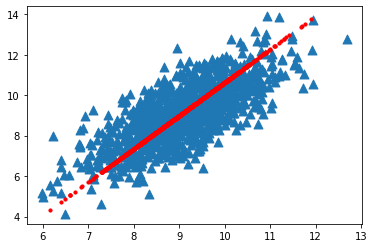

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# def loadDataSet(fileName, delim='\t'):
#     fr = open(fileName)
#     stringArr = [line.strip().split(delim) for line in fr.readlines()]
#     datArr = list(map(float, line) for line in stringArr)
#     return np.mat(datArr)



def loadDataSet(fileName):      #general function to parse tab -delimited floats
    dataMat = []                #assume last column is target value
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = []
        for i in curLine:
            fltLine.append(float(i))
        dataMat.append(fltLine)
    return dataMat

def pca(dataMat, topNfeat=9999999):
    """pca
    Args:
        dataMat-原数据集矩阵
        topNfeat-应用的N个特征
    Returns:
        lowDDataMat-降维后数据集
        reconMat-新的数据集空间
    """

    # 计算每一列的均值
    meanVals = np.mean(dataMat, axis=0)
    # 每个向量同时都减去 均值
    meanRemoved = dataMat - meanVals
    # cov协方差=[(x1-x均值)*(y1-y均值)+(x2-x均值)*(y2-y均值)+...+(xn-x均值)*(yn-y均值)+]/(n-1)
    '''
    方差：（一维）度量两个随机变量关系的统计量
    协方差： （二维）度量各个维度偏离其均值的程度
    协方差矩阵：（多维）度量各个维度偏离其均值的程度
    当 cov(X, Y)>0时，表明X与Y正相关；(X越大，Y也越大；X越小Y，也越小。这种情况，我们称为“正相关”。)
    当 cov(X, Y)<0时，表明X与Y负相关；
    当 cov(X, Y)=0时，表明X与Y不相关。
    '''
    covMat = np.cov(meanRemoved, rowvar=0)
    # eigVals为特征值， eigVects为特征向量
    eigVals, eigVects = np.linalg.eig(np.mat(covMat))
    print ('eigVals=', eigVals)
    print( 'eigVects=', eigVects)
    # 对特征值，进行从小到大的排序，返回从小到大的index序号
    # 特征值的逆序就可以得到topNfeat个最大的特征向量
    eigValInd = np.argsort(eigVals)
    eigValInd = eigValInd[:-(topNfeat+1):-1]
    # 重组 eigVects 最大到最小
    redEigVects = eigVects[:, eigValInd]
    print ('redEigVects=', redEigVects)
    # 将数据转换到新空间
    print( "---", np.shape(meanRemoved), np.shape(redEigVects))
    lowDDataMat = meanRemoved * redEigVects
    reconMat = (lowDDataMat * redEigVects.T) + meanVals
    print ('lowDDataMat=', np.shape(lowDDataMat))
    print ('reconMat=', np.shape(reconMat))
    return lowDDataMat, reconMat


def replaceNanWithMean():
    datMat = loadDataSet('./secom.data',' ')
    print(datMat)
    numFeat = np.shape(datMat)[1]
    for i in range(numFeat):
        # 对value不为NaN的求均值
        # .A 返回矩阵基于的数组
        meanVal = np.mean(datMat[np.nonzero(~np.isnan(datMat[:, i].A))[0], i])
        # 将value为NaN的值赋值为均值
        datMat[nonzero(np.isnan(datMat[:, i].A))[0], i] = meanVal
    return datMat 


def show_picture(dataMat, reconMat):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    dataMat=np.array(dataMat)
    reconMat=np.array(reconMat)
    ax.scatter(dataMat[:, 0].flatten(),
               dataMat[:, 1].flatten(), marker='^', s=80)
    ax.scatter(reconMat[:, 0].flatten(), reconMat[:,
               1].flatten(), marker='o', s=10, c='red')
    plt.show()


def analyse_data(dataMat):
    meanVals = mean(dataMat, axis=0)
    meanRemoved = dataMat-meanVals
    covMat = cov(meanRemoved, rowvar=0)
    eigvals, eigVects = linalg.eig(mat(covMat))
    eigValInd = np.argsort(eigvals)

    topNfeat = 20
    eigValInd = eigValInd[:-(topNfeat+1):-1]
    cov_all_score = float(sum(eigvals))
    sum_cov_score = 0
    for i in range(0, len(eigValInd)):
        line_cov_score = float(eigvals[eigValInd[i]])
        sum_cov_score += line_cov_score
        '''
        我们发现其中有超过20%的特征值都是0。
        这就意味着这些特征都是其他特征的副本，也就是说，它们可以通过其他特征来表示，而本身并没有提供额外的信息。
        最前面15个值的数量级大于10^5，实际上那以后的值都变得非常小。
        这就相当于告诉我们只有部分重要特征，重要特征的数目也很快就会下降。
        最后，我们可能会注意到有一些小的负值，他们主要源自数值误差应该四舍五入成0.
        '''
        print("主成分：{}, 方差占比：{}{}, 累积方差占比：{}{}".format(i+1, '2.0f', line_cov_score /
              cov_all_score*100, '4.2f', (sum_cov_score/cov_all_score*100, '4.1f')))


if __name__ == "__main__":
    # 加载数据，并转化数据类型为float
    dataMat = loadDataSet('./testSet.txt')
    # 只需要1个特征向量
    lowDmat, reconMat = pca(dataMat, 1)
    # 只需要2个特征向量，和原始数据一致，没任何变化
    # lowDmat, reconMat = pca(dataMat, 2)
    # print (shape(lowDmat))
    show_picture(dataMat, reconMat)

    # 利用PCA对半导体制造数据降维              
#     dataMat = replaceNanWithMean()
#     print(np.shape(dataMat))
#     # 分析数据
#     analyse_data(dataMat)

主成分：1, 方差占比：59.25405798334103, 累积方差占比：59.25405798334103
主成分：2, 方差占比：24.123818869605014, 累积方差占比：83.37787685294603
主成分：3, 方差占比：9.150013588650665, 累积方差占比：92.5278904415967
主成分：4, 方差占比：2.3005785173054276, 累积方差占比：94.8284689589021
主成分：5, 方差占比：1.4591923458304494, 累积方差占比：96.28766130473258
主成分：6, 方差占比：0.5188175327846476, 累积方差占比：96.80647883751723
主成分：7, 方差占比：0.3226580948767241, 累积方差占比：97.12913693239396
主成分：8, 方差占比：0.314676653563456, 累积方差占比：97.44381358595741
主成分：9, 方差占比：0.2630795326453148, 累积方差占比：97.70689311860272
主成分：10, 方差占比：0.23130665828884686, 累积方差占比：97.93819977689158
主成分：11, 方差占比：0.21753457834906226, 累积方差占比：98.15573435524064
主成分：12, 方差占比：0.2072819952812222, 累积方差占比：98.36301635052187
主成分：13, 方差占比：0.16908376947907647, 累积方差占比：98.53210012000095
主成分：14, 方差占比：0.12559066218864232, 累积方差占比：98.6576907821896
主成分：15, 方差占比：0.12035340182520561, 累积方差占比：98.7780441840148
主成分：16, 方差占比：0.11409210162539674, 累积方差占比：98.8921362856402
主成分：17, 方差占比：0.11111541175048817, 累积方差占比：99.0032516973907
主成分：18, 方差占比：0.0924581478

<Figure size 1080x576 with 0 Axes>

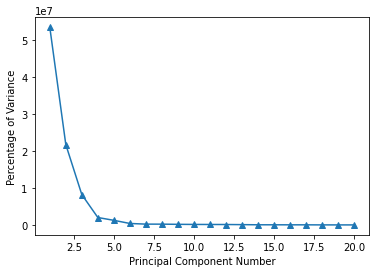

In [2]:
from numpy import *
import matplotlib.pylab as plt

# 数据文件加载函数
def loadDataSet(fileName, delim='\t'):
    #打开文件
    fr = open(fileName)
    #按行读取文件
    stringArr = [line.strip().split(delim) for line in fr.readlines()]
    #转化数值类型为浮点数
    dataArr = [list(map(float,line)) for line in stringArr]
    #返回矩阵格式
    return mat(dataArr)

# PCA降维处理函数
def pca(dataMat, topNfeat=9999999):
    #按axis=0的方向，对矩阵求和
    meanVals = mean(dataMat,axis=0)
    #减去对应均值
    meanRemoved = dataMat - meanVals
    #构造协方差矩阵
    covMat = cov(meanRemoved,rowvar=0)
    #求得特征值及特征向量
    eigVals,eigVects = linalg.eig(mat(covMat))
    #依据特征值大小获得对应特征值的序号
    eigValInd = argsort(eigVals)
    #取得按特征值排序前topNfeat的特征值对应序号
    eigValInd = eigValInd[:-(topNfeat+1):-1]
    #获取前topNfeat特征值对应的特征向量
    redEigVects = eigVects[:,eigValInd]
    #对数据进行降维处理
    lowDDatsMat = meanRemoved*redEigVects
    #把降维之后数据恢复到原始二维坐标系表示
    reconMat = (lowDDatsMat*redEigVects.T)+meanVals
    #返回降维数据和变换换后二维坐标数据
    return lowDDatsMat,reconMat

def replaceNanWithMean():
    #读取数据
    dataMat = loadDataSet('secom.data',' ')
    #获取数据集的列数
    numFeat = shape(dataMat)[1]
    #遍历每一列，处理对应的缺失值
    for i in range(numFeat):
        #获取当前列非零值，非缺失值下的平均值
        meanVal = mean(dataMat[nonzero(~isnan(dataMat[:,i].A))[0],i])
        #使用列平均值替换缺失值
        dataMat[nonzero(isnan(dataMat[:,i].A))[0],i] = meanVal
    return dataMat

def analyse_data(dataMat):
    meanVals = mean(dataMat, axis=0)
    meanRemoved = dataMat-meanVals
    covMat = cov(meanRemoved, rowvar=0)
    eigvals, eigVects = linalg.eig(mat(covMat))
    eigValInd = np.argsort(eigvals)
    topNfeat = 20
    eigValInd = eigValInd[:-(topNfeat+1):-1]
    cov_all_score = float(sum(eigvals))
    sum_cov_score = 0
    for i in range(0, len(eigValInd)):
        line_cov_score = float(eigvals[eigValInd[i]])
        sum_cov_score += line_cov_score
        '''
        我们发现其中有超过20%的特征值都是0。
        这就意味着这些特征都是其他特征的副本，也就是说，它们可以通过其他特征来表示，而本身并没有提供额外的信息。
        最前面15个值的数量级大于10^5，实际上那以后的值都变得非常小。
        这就相当于告诉我们只有部分重要特征，重要特征的数目也很快就会下降。
        最后，我们可能会注意到有一些小的负值，他们主要源自数值误差应该四舍五入成0.
        '''
        print("主成分：{}, 方差占比：{}, 累积方差占比：{}".format(i+1,line_cov_score /cov_all_score*100, (sum_cov_score/cov_all_score*100)))
    plt.figure(figsize=(15,8))
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(range(1, 21), eigvals[eigValInd], marker='^')
    plt.xlabel('Principal Component Number')
    plt.ylabel('Percentage of Variance')
    valueL=[i for i in range(20)]
    plt.show()

if __name__ == '__main__':
    dataMat = replaceNanWithMean()
    analyse_data(dataMat)

## SVD

In [3]:
from numpy import *
from numpy import linalg as la

# 打印32*32大小的经过阈值分化后的矩阵
def printMat(inMat, thresh=0.8):
    for i in range(32):
        for k in range(32):
            if float(inMat[i, k]) > thresh:
                print(1, end='')
            else:
                print(0, end='')
        print('')

# 图像压缩
def imgCompress(numSV=3, thresh=0.8):
    myl = []
    for line in open('0_5.txt',encoding='utf-8').readlines():
        newRow = []
        for i in range(32):
            newRow.append(int(line[i]))
        myl.append(newRow)
    myMat = mat(myl)
    print("*************原始矩阵*************")
    printMat(myMat, thresh)
    U, Sigma, VT = la.svd(myMat)
    SigRecon = mat(zeros((numSV, numSV)))
    for k in range(numSV):
        SigRecon[k, k] = Sigma[k]
    reconMat = U[:, :numSV] * SigRecon * VT[:numSV, :]
    print("*******用%d个奇异值重构的矩阵********" % numSV)
    printMat(reconMat, thresh)

if __name__ == '__main__':
    imgCompress(2)

*************原始矩阵*************
00000000000000110000000000000000
00000000000011111100000000000000
00000000000111111110000000000000
00000000001111111111000000000000
00000000111111111111100000000000
00000001111111111111110000000000
00000000111111111111111000000000
00000000111111100001111100000000
00000001111111000001111100000000
00000011111100000000111100000000
00000011111100000000111110000000
00000011111100000000011110000000
00000011111100000000011110000000
00000001111110000000001111000000
00000011111110000000001111000000
00000011111100000000001111000000
00000001111100000000001111000000
00000011111100000000001111000000
00000001111100000000001111000000
00000001111100000000011111000000
00000000111110000000001111100000
00000000111110000000001111100000
00000000111110000000001111100000
00000000111110000000011111000000
00000000111110000000111111000000
00000000111111000001111110000000
00000000011111111111111110000000
00000000001111111111111110000000
00000000001111111111111110000000
000000000001

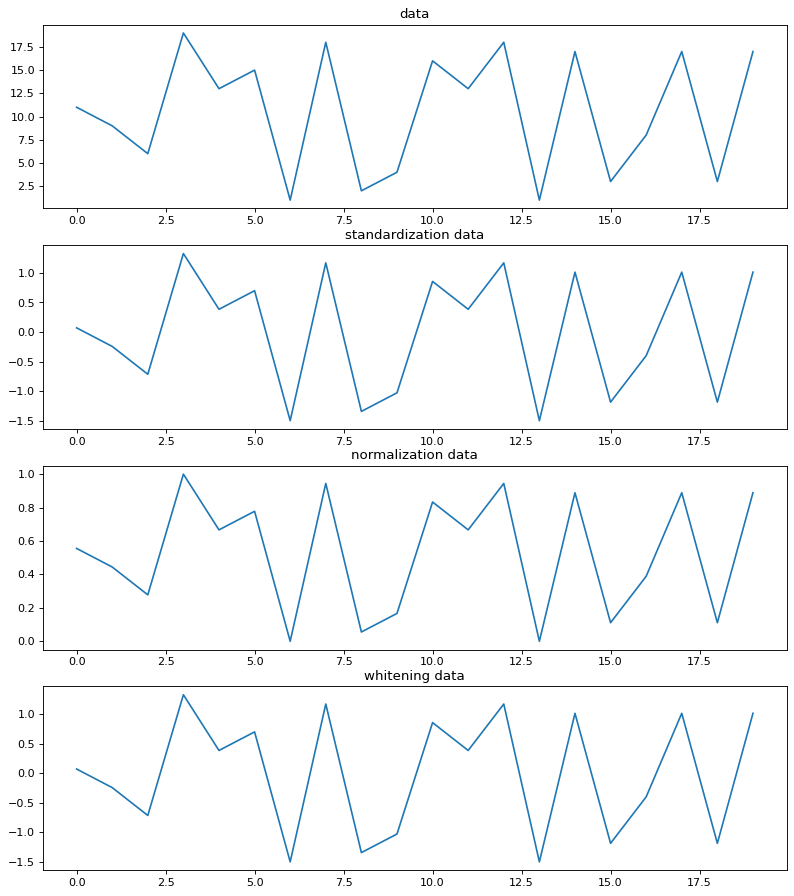

In [4]:
def plot(data):  # 可视化数据处理后的分布情况
    plt.figure(figsize=(12, 14), dpi=80)
    ax1 = plt.subplot(411)
    ax1.set_title('data')
    ax2 = plt.subplot(412)
    ax2.set_title('standardization data')
    ax3 = plt.subplot(413)
    ax3.set_title('normalization data')
    ax4 = plt.subplot(414)
    ax4.set_title('whitening data')
    ax1.plot(data)
    ax2.plot(standardization(data))
    ax3.plot(normalization(data))
    ax4.plot(whitening(data))
    plt.show()


def normalization(data):  # 归一化
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range


def standardization(data):  # 0均值1方差标准化
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0)
    return (data - mu) / sigma


def whitening(data):

    normdata = standardization(data)
    vardata = normdata/np.std(normdata, axis=0)
    return vardata


if __name__ == '__main__':
    data = np.random.randint(1, 20, size=(20))  # 生成20个取值范围为1到20之间的随机整数
    plot(data)

[27.41534032 31.21728222 33.26588359]


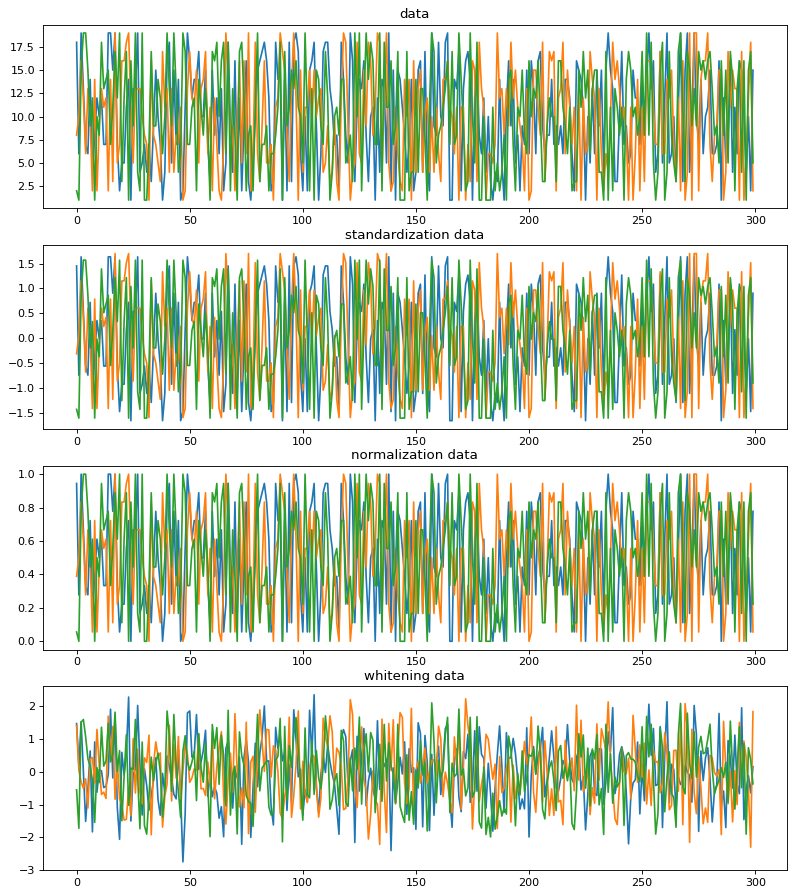

In [13]:
import numpy as np
import matplotlib.pyplot as plt


def plot(data):  # 可视化数据处理后的分布情况
    plt.figure(figsize=(12, 14), dpi=80)
    ax1 = plt.subplot(411)
    ax1.set_title('data')
    ax2 = plt.subplot(412)
    ax2.set_title('standardization data')
    ax3 = plt.subplot(413)
    ax3.set_title('normalization data')
    ax4 = plt.subplot(414)
    ax4.set_title('whitening data')
    ax1.plot(data)
    ax2.plot(standardization(data))
    ax3.plot(normalization(data))
    low,whitedata=whitening(data)
    ax4.plot(whitedata)
    plt.show()


def normalization(data):  # 归一化
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range


def standardization(data):  # 0均值1方差标准化
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0)
    return (data - mu) / sigma


if __name__ == '__main__':
    data = np.random.randint(1, 20, size=(300,3))#范围为1到20之间的随机整数
    plot(data)

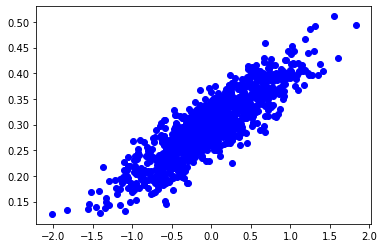

[0.31370674 0.00097765]


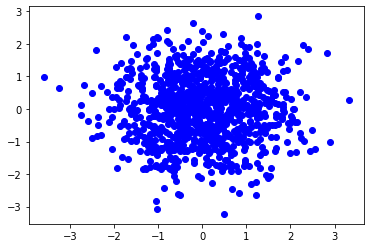

[[ 1.00000000e+00 -4.87208983e-16]
 [-4.87208983e-16  1.00000000e+00]]


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 随机生成1000个点，围绕在y=0.1x+0.3的直线周围
num_points = 1000
vectors_set = np.zeros((num_points, 2))
for i in range(num_points):
    x1 = np.random.normal(0.0, 0.55)
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set[i] = np.array([x1, y1])


def whitening(dataMat):
    # 计算每一列的均值
    meanVals = np.mean(dataMat, axis=0)
    # 每个向量同时都减去 均值
    meanRemoved = dataMat - meanVals
    # cov协方差=[(x1-x均值)*(y1-y均值)+(x2-x均值)*(y2-y均值)+...+(xn-x均值)*(yn-y均值)+]/(n-1)
    covMat = np.cov(meanRemoved, rowvar=0)
    # eigVals为特征值， eigVects为特征向量
    eigVals, eigVects = np.linalg.eig(np.mat(covMat))
    print(eigVals) #eigVals not negative
    eigValInd = np.argsort(eigVals)
    redEigVects = eigVects[:, eigValInd]
    lowDDataMat = meanRemoved * redEigVects
    #lowDDataMat=lowDDataMat/np.std(lowDDataMat, axis=0)
    featNum = np.shape(dataMat)[1]
    LDiag = np.mat(np.zeros((featNum, featNum)))
    for k in range(featNum):#construct diagonal matrix from vector
        LDiag[k,k] = 1/np.sqrt(eigVals[k])
#     print(LDiag)
#     print(eigVects)
#     print(meanRemoved)
    whitDataMat = LDiag * eigVects.T * meanRemoved.T
#     print(np.cov(whitDataMat.T, rowvar=0))
    return lowDDataMat, whitDataMat.T

if __name__=='__main__':
    plt.scatter(vectors_set[:, 0], vectors_set[:, 1], c='b')  # c表示颜色
    plt.show()
    data=whitening(vectors_set)
    data,whitDataMat=np.array(data)
    plt.scatter(whitDataMat[:,0],whitDataMat[:,1],c='b')
    plt.show()
    print(np.cov(whitDataMat, rowvar=0))
    #print(np.corrcoef(data, rowvar=0))